# Decision Tree

In [12]:
from scipy.sparse import load_npz
import re ## regular expression operator
import numpy as np
import pandas as pd
import string 
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report

# Data Manipulation
import re ## regular expression operator
import numpy as np
import pandas as pd
import string 


# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Methods and stopwords text processing
import nltk ## natural language toolkit
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer


# Machine Learning Libraries
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




#Load csv files
DATASET_ENCODING = "ISO-8859-1"
y_train = pd.read_csv('y_train.csv', squeeze=True, encoding=DATASET_ENCODING)[:-1]
y_test = pd.read_csv('y_test.csv', squeeze=True, encoding=DATASET_ENCODING)[:-1]
X_test = pd.read_csv('X_test.csv', squeeze=True, encoding=DATASET_ENCODING)[:-1]
X_train = pd.read_csv('X_train.csv', squeeze=True, encoding=DATASET_ENCODING)[:-1]

X_train.fillna('', inplace=True)
X_test.fillna('', inplace=True)


C:\Users\Thamires\AppData\Local\Temp\ipykernel_6528\1647097947.py:53: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_train = pd.read_csv('y_train.csv', squeeze=True, encoding=DATASET_ENCODING)[:-1]
C:\Users\Thamires\AppData\Local\Temp\ipykernel_6528\1647097947.py:54: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_test = pd.read_csv('y_test.csv', squeeze=True, encoding=DATASET_ENCODING)[:-1]
C:\Users\Thamires\AppData\Local\Temp\ipykernel_6528\1647097947.py:55: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  X_test = pd.read_csv('X_test.csv', squeeze=True, encoding=DATASET_ENCODING)[:-1]
C:\Users\Thamires\AppData\Local\Temp\ipykernel_6528\1647097947.py:56: FutureWarning: The 

In [2]:
# # vectorize the text data
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectorizer.fit(X_train)
print('Vectorizer fitted.')
print('No. of feature_words: ', len(vectorizer.get_feature_names_out()))

# # transform the text data into a sparse matrix
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

Vectorizer fitted.
No. of feature_words:  248706


In [7]:
# Evaluate Model Function

def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test_vec)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# Decision Tree 

In [6]:
dc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dc.fit(X_train_vec, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [8]:
y_pred_dc = dc.predict(X_test_vec)
print("Accuracy:\n", accuracy_score(y_test, y_pred_dc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dc))
print("Classification Report:\n", classification_report(y_test, y_pred_dc))

Accuracy:
 0.696848424212106
Confusion Matrix:
 [[719 264]
 [342 674]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.73      0.70       983
           4       0.72      0.66      0.69      1016

    accuracy                           0.70      1999
   macro avg       0.70      0.70      0.70      1999
weighted avg       0.70      0.70      0.70      1999



              precision    recall  f1-score   support

           0       0.68      0.73      0.70       983
           4       0.72      0.66      0.69      1016

    accuracy                           0.70      1999
   macro avg       0.70      0.70      0.70      1999
weighted avg       0.70      0.70      0.70      1999



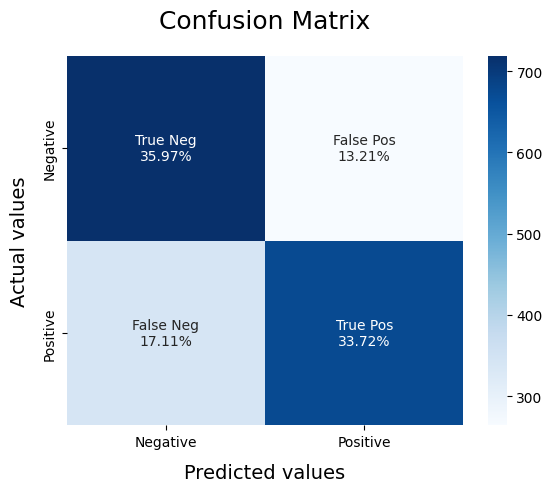

In [10]:
model_Evaluate(dc)

# Random Forest

In [13]:
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train_vec, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [14]:
y_pred_rf = rf.predict(X_test_vec)
print("Accuracy:\n", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy:
 0.7123561780890445
Confusion Matrix:
 [[763 220]
 [355 661]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.78      0.73       983
           4       0.75      0.65      0.70      1016

    accuracy                           0.71      1999
   macro avg       0.72      0.71      0.71      1999
weighted avg       0.72      0.71      0.71      1999



              precision    recall  f1-score   support

           0       0.68      0.78      0.73       983
           4       0.75      0.65      0.70      1016

    accuracy                           0.71      1999
   macro avg       0.72      0.71      0.71      1999
weighted avg       0.72      0.71      0.71      1999



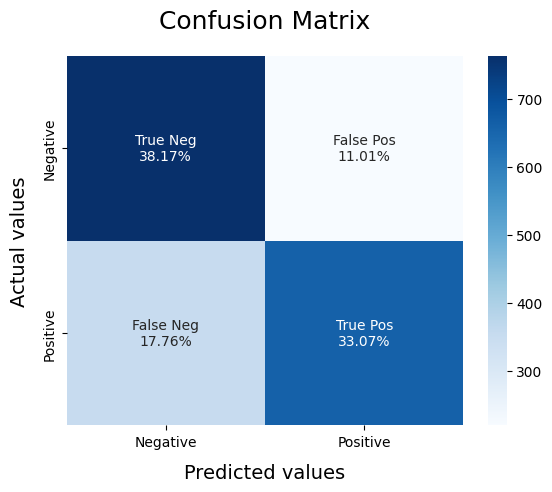

In [15]:
model_Evaluate(rf)